# Load Data

In [ ]:
!pip install spacytextblob
!pip install flair
!pip install umap
!pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 626.3/626.3 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: textblob
    Found existing installation: textblob 0.17.1
    Uninstalling textblob-0.17.1:
      Successfully uninstalled textblob-0.17.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 29.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.5/776.5 kB 44.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import json
import pandas as pd
import spacy
import spacytextblob
from umap import UMAP
from tqdm import tqdm
import nltk
import flair
import gensim
import umap
import numpy as np
import plotly.express as px
import transformers
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from bertopic import BERTopic

# Mounting Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Load Dataset

In [ ]:
combined_data = pd.read_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/reddit_sample_data/combined_reddit_labelled_data.csv', delimiter=",")

In [ ]:
combined_data.head(20)

text           username  \
0   Nowadays ah beng only know how to "CB limpei g...             hatuah   
1   It mentions the same mechanisms that I did: bl...     DuePomegranate   
2   They probably outsource delivery to delivery c...         _Hysteric_   
3   Wow its such a blessing to come across this po...      azura_eldoris   
4                    Yea, you can just bring them in.           alvinism   
5   From what I know the guy was way too gungho ag...           BR123456   
6   Maid behind the camera is like “ma’am the fire...   George_W_Bushido   
7   I don't have weighing scale at home so we'll s...          [deleted]   
8                                  What’s your major?          pokesterx   
9   Nice clip, very singapore \n\n0:25 Uncle weari...       aaronthro222   
10  How so? 400 plus upvotes and 200 plus comments...      equanimitynow   
11  You so bored until come over to bp so that can...       blackwoodsix   
12  Funny how they still put his title over there ...           Revalent   
13  Try skillshare! Sign up for free and take onli...     soconfused2292   
14  In the very first beginning, why bring kids in...        Anniem0sity   
15  And so, here we have the second quickest ticke...          houganger   
16  [time for the nets?](https://optimal.inven.co....         SpermWhale   
17  You cannot account for future losses which are...       Snowstormzzz   
18  I hope u didnt put effort in training the new ...     localinfluenza   
19  Is it doxxing when we know their full names th...  Throwaway90090011   

     parent_id       id subreddit_id  \
0   t1_fs6aspm  fs6losq     t5_2qh8c   
1   t1_fqlzzgb  fqnrcva     t5_2qh8c   
2   t1_fnedu77  fneem0a     t5_2qh8c   
3    t3_g2gvgk  fuuw0jc     t5_2qh8c   
4   t1_fmazvyu  fmb2w2h     t5_2qh8c   
5   t1_fvir4dh  fvivryq     t5_2qh8c   
6    t3_fyzzuy  fn2mjwd     t5_2qh8c   
7    t3_g8dd6f  fomubhg     t5_2qh8c   
8    t3_gly2op  fr18m6w     t5_2qh8c   
9    t3_g6kjs4  foa6q10     t5_2qh8c   
10  t1_fvy7tdf  fvy9b86     t5_2qh8c   
11  t1_frfyij6  frfyqjl     t5_2qh8c   
12  t1_fr3wb3x  fr445yw     t5_2qh8c   
13  t1_fmo7idw  fmoy0a0     t5_2qh8c   
14  t1_fuzo34g  fuzvlvr     t5_2qh8c   
15   t3_gz1t5n  ftf9qqa     t5_2qh8c   
16   t3_g3ews2  fnr3op9     t5_2qh8c   
17  t1_fqo86up  fqo9w41     t5_2qh8c   
18  t1_fnxl8bo  fnxoruz     t5_2qh8c   
19  t1_fslieq1  fslxr0e     t5_2qh8c   

                                                topic        date      time  \
0    man 20 allegedly slashed in ambush by 4 or 5 men  2020-05-29  09:09:33   
1     coronavirus doctors see huge drop in flu common  2020-05-14  23:46:12   
2    rsingapore random discussion and small questions  2020-04-14  18:13:10   
3                   resigning in the midst of covid19  2020-06-15  01:32:39   
4    rsingapore random discussion and small questions  2020-04-03  12:26:54   
5        chee soon juan to contest bukit batok smc in  2020-06-21  09:23:57   
6     not judging the eggs tbh she might have a large  2020-04-11  08:44:01   
7    how much weight have yall gainedloss during this  2020-04-26  12:27:55   
8             fresh grads of 2020 what are your plans  2020-05-18  15:21:42   
9          fairprice on wheels where customers can do  2020-04-23  11:23:25   
10   rsingapore random discussion and small questions  2020-06-25  13:15:10   
11   rsingapore random discussion and small questions  2020-05-22  12:43:46   
12                                be a good neighbour  2020-05-19  07:59:49   
13   rsingapore random discussion and small questions  2020-04-07  14:45:26   
14        so i heard a loud bang outside my flat this  2020-06-16  09:46:29   
15     sporean chinese male 19 arrested for allegedly  2020-06-08  23:56:41   
16          need to understand motivations to counter  2020-04-18  02:55:32   
17  singapore airlines posts first annual net loss in  2020-05-15  02:43:15   
18     hi everyone anyone here got laid off howre you  2020-04-20  00:39:06   
19   rsingapore random discussi

In [ ]:
toxic_data = combined_data[combined_data['toxic'] == 1]

In [ ]:
toxic_data.head(20)

text             username  \
18   I hope u didnt put effort in training the new ...       localinfluenza   
43   I'm sure it affects them less, they have huge ...            hosehliao   
115  stupid bad sia. Hope bad Auntie get served jus...               Hanzar   
117  morning peeps!  \n\n\ntake it slow for today a...          PlatinumGPA   
202                 NGL, that's...\n\nFUCKING AWESOME.           snowysnowy   
213         Yeah? Fuck everyone else... cause why not.            [deleted]   
236  We have developed plans to tackle this problem...      HarukiMurakarma   
267  Yes, the question is not about how stupid the ...            Inonymouz   
280  It’s a combination of shit hits the fan and se...         mystroseeker   
288  If he indeed a troll, he's nothing like Trump....    BreathOfTheOffice   
309  &gt;Unless I’m retarded and they’re actually m...     UnfairHelicopter   
316                                Thats really shitty             Eskipony   
357   &gt;  but they sure are fucking our economy\n\n?  NotoriousArseBandit   
398  The question should be why do you have tiny pi...           ZeroPauper   
413  Yah is strange cos blowjob will say oral sex\n...    SamBellFromSarang   
423  Yes it is projected to be mandatory wear. Othe...          Orangecuppa   
473  He asked me how the fack did i have his phone ...         HeavyArmsJin   
488  Fucking hell. I hope no one is gonna suggest y...                jmzyn   
505  I doubt Carohell gives a flying fuck. They pro...     AllGoodNamesTakn   
562         WOOO SWEE LA FUCK I GOT MY LAPTOP APPROVED         LucarioMagic   

      parent_id       id subreddit_id  \
18   t1_fnxl8bo  fnxoruz     t5_2qh8c   
43   t1_frfw1ou  frg85g9     t5_2qh8c   
115   t3_g5zo4c  fo7cb4j     t5_2qh8c   
117   t3_ggorjm  fq3dx28     t5_2qh8c   
202   t3_fwh3fp  fmp4trd     t5_2qh8c   
213  t1_fsyp2on  ft0nvps     t5_2qh8c   
236   t3_fwi23g  fmozbt0     t5_2qh8c   
267  t1_fpz8r50  fpz91xy     t5_2qh8c   
280   t3_go8rra  frfg5y2     t5_2qh8c   
288  t1_fr4r8x6  fr5o30v     t5_2qh8c   
309  t1_fqwb3mf  fqwymmg     t5_2qh8c   
316  t1_fv8iqea  fv8kxz5     t5_2qh8c   
357  t1_ft8hapz  ft8n0uf     t5_2qh8c   
398  t1_fmzni5t  fmznxg1     t5_2qh8c   
413  t1_fox9tkd  foxaeb8     t5_2qh8c   
423  t1_ftcd3ru  ftchan4     t5_2qh8c   
473  t1_fthipu5  fthl16j     t5_2qh8c   
488  t1_fpj3r4e  fpj5ut1     t5_2qh8c   
505   t3_gy5htt  ft8m6v0     t5_2qh8c   
562  t1_fme7e42  fmea33z     t5_2qh8c   

                                                topic        date      time  \
18     hi everyone anyone here got laid off howre you  2020-04-20  00:39:06   
43   woman charged with meeting boyfriend not wearing  2020-05-22  14:20:24   
115    auntie cursed and spat at an essential service  2020-04-22  17:18:22   
117  rsingapore random discussion and small questions  2020-05-09  23:04:49   
202    this is how you can wear a face protectionfull  2020-04-07  15:47:34   
213    covid19 number of unemployed residents may hit  2020-06-05  21:54:59   
236        exminister yaacob ibrahim apologises after  2020-04-07  14:57:23   
267                suspected jobs support scheme scam  2020-05-09  09:05:34   
280  im pretty sure its second wave of infection hits  2020-05-22  07:54:25   
288                     how to defeat the coronavirus  2020-05-19  18:09:44   
309  anyone going to talk about money minting by grab  2020-05-17  13:17:02   
316  rsingapore random discussion and small questions  2020-06-18  15:00:59   
357  a rant on govts handling of cb that i dont think  2020-06-07  04:45:24   
398                                     why not bidet  2020-04-10  13:34:13   
413   woman charged with allowing customer into salon  2020-04-29  05:30:07   
423  rsingapore random discussion and small questions  2020-06-08  06:45:58   
473  rsingapore random discussion and small questions  2020-06-09  16:07:58   
488     covid19 josephine teos response when asked if  2020-05-05  05:44:44   
505      carousell account 

In [ ]:
for i, comment in enumerate(toxic_data["text"][:30]):
  print(f"{i}) {comment}")

0) I hope u didnt put effort in training the new guy. What a scum employer.
1) I'm sure it affects them less, they have huge houses and nice backyard to escape to.

I'm gonna spend much more time outside next week onwards. Fuck this ridiculous "exit".
2) stupid bad sia. Hope bad Auntie get served justice sia....
3) morning peeps!  


take it slow for today and think about cheese. those gooey things when you melt it, damn delilsh.
4) NGL, that's...

FUCKING AWESOME.
5) Yeah? Fuck everyone else... cause why not.
6) We have developed plans to tackle this problem of not showing basic fucking human decency towards the most vulnerable members of our society.

But it takes a virus to flush out the secret xenophobes.
7) Yes, the question is not about how stupid the government is but where in the bureaucracy are we supposed to report? The priority is to get assistance for my aunt not try to fight someone
8) It’s a combination of shit hits the fan and second wave hits.
9) If he indeed a troll, h

# Data Visualisation

Word Cloud of Sampled Data

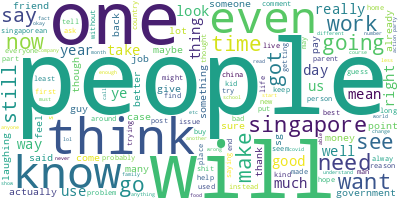

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(combined_data['cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Word Cloud of Toxic Data

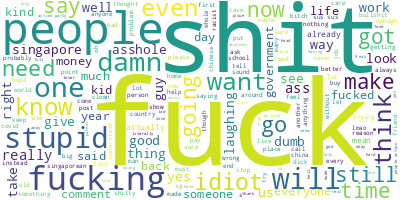

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(toxic_data['cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

Word Cloud of Toxic Data (curse words removed)

In [ ]:
import re

curse_words = ['fuck','freaks','fk', 'fks','fucking', 'fucked', 'shit', 'freak', 'freaks', 'freaking', 'gtfo', 'shit', 'shits', 'shitty', 'dumb', 'idiot', 'asshole',
               'stupid', 'bitch', 'suck'
              ]
curse_pattern = re.compile(r'\b(?:' + '|'.join(curse_words) + r')\b', flags=re.IGNORECASE)

# Function to clean curse words from text
def remove_curse_words(text):
    return curse_pattern.sub('', text)


toxic_data['twice_cleaned_text'] = toxic_data['cleaned_text'].apply(remove_curse_words) #cleaned text without curse

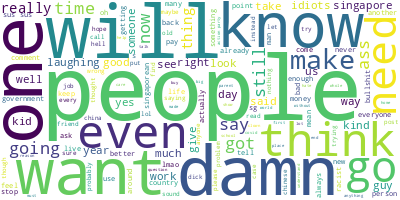

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(toxic_data['twice_cleaned_text'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

# LDA on Toxic Data

**Preproccessing and Vectorising the Data**

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Custom stop words
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# Add in curse words and more stopwords into the list of stopwords
curse_words_df = pd.read_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/DirtyWords.csv")
curse_words = curse_words_df[curse_words_df["language"]=="en"]["word"].tolist() # Get the english curse words
stopwords = list(set(['fuck','freaks','fk', 'fks','fucking', 'fucker', 'fucked', 'shit', 'freak', 'freaks', 'freaking', 'gtfo', 'shit', 'shits', 'shitty', 'dumb', 'stupid',
                      'damn', 'dick', 'cock', 'penis', 'sg', 'idiot', 'suck', 'asshole', 'bitch', 'singapore', 'singaporeans', 'singaporean', 'i', 'in', 'just',
                      'like', 'people', 'does', 'damm', 'really', 'ass', 'pussy', 'did', 'oh', 'think', 'bitches', 'right', 'actual', 'dammit', 'got', 'bullshit',
                      'simp', 'guy', 'idiots', 'want', 'know', 'going', 'think', 'got', 'say', 'idiots', 'yes', 'guy', 'thing', 'bullshit', 'way',  'ugly', 'masturbate',
                      'cum', 'horny', 'ball', 'big', 'hand', 'gf', 'love', 'girl', 'fetish', 'juicy', 'make', 'inch', 'sexy', 'cut', 'start', 'lanjiao', 'wow', 'sian',
                      'fuckin', 'holy', 'ya', 'seriously', 'okay', 'yea', 'alright', 'haha', 'yeo', 'hahahaha', 'dumbass', 'anyways', 'moan', 'hahha', 'yeah', 'fucktard',
                      'idiotic', 'fool', 'foolish', 'stupidity'] + curse_words + list(ENGLISH_STOP_WORDS)))

In [ ]:
#Remove stopwords, numbers and punctuation and do lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence, model):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(model.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Initialize punctuation and numbers
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~’|=+`‘…“”®¯'''
numbers = '''1234567890'''


class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence(words, self.wnl)
    words_lst = [t for t in word_tokenize(words)]
    return words_lst

#tokenizer = LemmaTokenizer()
#tokenizer.__call__("happily 123 ,,,,, cheering")

In [ ]:
vectorizer = CountVectorizer(stop_words=stopwords, tokenizer=LemmaTokenizer())
dtm = vectorizer.fit_transform(toxic_data['cleaned_text'])

**Finding Optimal Number of Topics**

In [ ]:
from gensim.models import CoherenceModel
from gensim.corpora import Dictionary

# Create a Gensim Dictionary and Corpus
texts_tokenized = [text.split() for text in toxic_data['cleaned_text']]
dictionary = Dictionary(texts_tokenized)
corpus = [dictionary.doc2bow(text) for text in texts_tokenized]

In [ ]:
# For cleaning of the cleaned_text column that will be tokenized and then used as texts, corpus and dictionary in the calculation of coherence score
def lemmatize_sentence2(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(WordNetLemmatizer().lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence2(words)
    return words

def remove_stopwords(words):
  result = []
  for i in words.split(" "):
    if i not in stopwords:
      result.append(i)
  result = ' '.join(result)
  return result

tokens = toxic_data['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

In [ ]:
# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from scipy.spatial import distance
from itertools import combinations

In [ ]:
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

In [ ]:
n_topics_list = [3, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
coherence_scores = []

for n_topics in tqdm(n_topics_list):

    lda = LatentDirichletAllocation(n_components = n_topics, random_state = 1)
    lda.fit(dtm)
    lda_topics = lda.components_
    lda_topics_words = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-3 - 1:-1]] for topic in lda_topics]
    coherence_model_lda = CoherenceModel(topics = lda_topics_words,
                                         texts = doc_tokens,
                                         corpus = corpus,
                                         dictionary = dictionary,
                                         coherence = 'c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Number of topics: {n_topics} | Coherence Score: {coherence_lda}")
    coherence_scores.append(coherence_lda)

  9%|▉         | 1/11 [00:27<04:36, 27.61s/it]

Number of topics: 3 | Coherence Score: 0.5306400253557615


 18%|█▊        | 2/11 [00:48<03:34, 23.83s/it]

Number of topics: 5 | Coherence Score: 0.5845379553121919


 27%|██▋       | 3/11 [01:04<02:41, 20.25s/it]

Number of topics: 10 | Coherence Score: 0.6614033240102168


 36%|███▋      | 4/11 [01:23<02:16, 19.47s/it]

Number of topics: 15 | Coherence Score: 0.6410704092345394


 45%|████▌     | 5/11 [01:40<01:51, 18.62s/it]

Number of topics: 20 | Coherence Score: 0.6149848905599992


 55%|█████▍    | 6/11 [01:56<01:29, 17.93s/it]

Number of topics: 25 | Coherence Score: 0.6057003271540666


 64%|██████▎   | 7/11 [02:13<01:10, 17.59s/it]

Number of topics: 30 | Coherence Score: 0.603512270307193


 73%|███████▎  | 8/11 [02:31<00:52, 17.62s/it]

Number of topics: 35 | Coherence Score: 0.6388271823390674


 82%|████████▏ | 9/11 [02:49<00:35, 17.82s/it]

Number of topics: 40 | Coherence Score: 0.5801921945444868


 91%|█████████ | 10/11 [03:08<00:18, 18.10s/it]

Number of topics: 45 | Coherence Score: 0.5843708305027422


100%|██████████| 11/11 [03:27<00:00, 18.89s/it]

Number of topics: 50 | Coherence Score: 0.5920854622027193


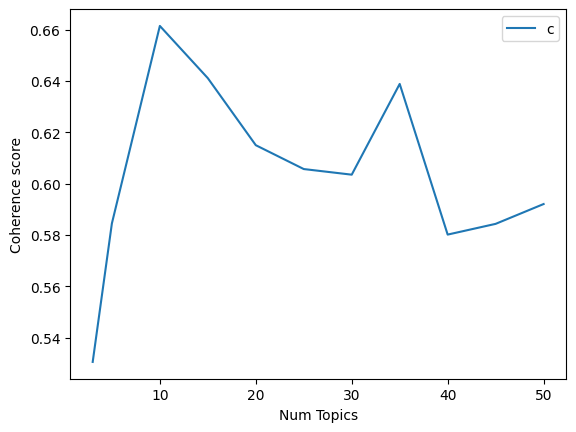

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_topics_list, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

Since the peak in coherence score is at 10, we run the test again for the n_components values around 10.

In [ ]:
n_topics_list = [6,7,8,9,10,11,12,13,14]
coherence_scores = []

for n_topics in tqdm(n_topics_list):

    lda = LatentDirichletAllocation(n_components = n_topics, random_state = 1)
    lda.fit(dtm)
    lda_topics = lda.components_
    lda_topics_words = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-3 - 1:-1]] for topic in lda_topics]
    coherence_model_lda = CoherenceModel(topics = lda_topics_words,
                                         texts = doc_tokens,
                                         corpus = corpus,
                                         dictionary = dictionary,
                                         coherence = 'c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print(f"Number of topics: {n_topics} | Coherence Score: {coherence_lda}")
    coherence_scores.append(coherence_lda)

 11%|█         | 1/9 [00:26<03:33, 26.66s/it]

Number of topics: 6 | Coherence Score: 0.6164591571174906


 22%|██▏       | 2/9 [00:48<02:48, 24.03s/it]

Number of topics: 7 | Coherence Score: 0.6196022793208324


 33%|███▎      | 3/9 [01:04<02:02, 20.40s/it]

Number of topics: 8 | Coherence Score: 0.610731415869715


 44%|████▍     | 4/9 [01:20<01:33, 18.62s/it]

Number of topics: 9 | Coherence Score: 0.591949651591943


 56%|█████▌    | 5/9 [01:37<01:11, 17.78s/it]

Number of topics: 10 | Coherence Score: 0.6614033240102168


 67%|██████▋   | 6/9 [01:52<00:50, 16.90s/it]

Number of topics: 11 | Coherence Score: 0.6422469246858656


 78%|███████▊  | 7/9 [02:07<00:32, 16.45s/it]

Number of topics: 12 | Coherence Score: 0.6551107553586207


 89%|████████▉ | 8/9 [02:26<00:17, 17.11s/it]

Number of topics: 13 | Coherence Score: 0.5979096821452782


100%|██████████| 9/9 [02:41<00:00, 17.98s/it]

Number of topics: 14 | Coherence Score: 0.6188044392523703


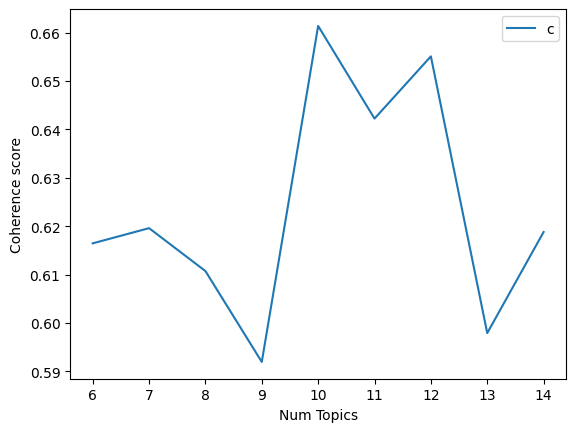

In [ ]:
import matplotlib.pyplot as plt
plt.plot(n_topics_list, coherence_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

We run LDA with number of topics set at 10, as it has the highest coherence score.

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [ ]:
lda = LatentDirichletAllocation(n_components = 10, random_state = 1)
lda.fit(dtm)
no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
kid, day, video, life, work, spread, use, money, try, face
Topic 1:
pay, come, look, let, tell, try, lol, life, government, scum
Topic 2:
ask, year, use, pay, party, kill, need, shut, time, dude
Topic 3:
time, try, life, racist, good, parent, look, comment, read, friend
Topic 4:
mean, laugh, good, sound, food, person, use, pathetic, need, true
Topic 5:
post, ask, original, need, come, try, work, year, die, country
Topic 6:
need, work, good, time, covid, talk, actually, clown, china, use
Topic 7:
party, vote, need, action, time, tell, eat, ask, post, year
Topic 8:
sus, sure, time, look, trash, game, disgust, work, good, single
Topic 9:
good, use, time, god, bad, car, look, cyclist, government, drive


**Coherence Score**

In [ ]:
lda_topics = lda.components_
lda_topics_words = [[vectorizer.get_feature_names_out()[i] for i in topic.argsort()[:-3 - 1:-1]] for topic in lda_topics]

coherence_model_lda = CoherenceModel(topics = lda_topics_words,
                                     texts = doc_tokens,
                                     dictionary = dictionary,
                                     coherence = 'c_v')

coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score for LDA Model: {coherence_lda}')

Coherence Score for LDA Model: 0.6614033240102168


**Diversity Score**

In [ ]:
! pip install fasttext

In [ ]:
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

In [ ]:
# A function that calculates the diversity score between the topic labels of the different topics generated
def pairwise_word_embedding_distance(topics, word_embedding_model, topk=10):
    count = 0
    sum_dist = 0
    for list1, list2 in combinations(topics, 2):
        count = count+1
        word_counts = 0
        dist = 0
        topk = min(topk,len(list1),len(list2)) #this has been edited to prevent errors raised when the number of representative words in a topic is lesser than topk
        for word1 in list1[:topk]:
            for word2 in list2[:topk]:
                dist = dist + distance.cosine(ft[word1], ft[word2])
                word_counts = word_counts + 1
        dist = dist/word_counts
        sum_dist = sum_dist + dist
    return sum_dist/count

In [ ]:
ft = fasttext.load_model('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/cc.en.300.bin')

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(lda_topics_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(f'Diversity Score for LDA Model: {div_score}')

Diversity Score for LDA Model: 0.7411684963860492


**LDA on text (original)**

In [ ]:
#Step 1: Preprocess the data
texts_preprocessed = [preprocess(text) for text in toxic_data['cleaned_text']]

# Step 2: Vectorizing the text data
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(texts_preprocessed)

# Step 3: Applying LDA for Topic Modeling
lda = LatentDirichletAllocation(n_components = 10, random_state = 1)
lda.fit(dtm)

# Step 4: Extracting and Displaying Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
shit, damn, people, one, sus, party, fucking, fuck, action, know
Topic 1:
people, like, shit, idiot, fucking, fuck, one, stupid, think, even
Topic 2:
fuck, shit, fucking, people, like, would, get, one, even, time
Topic 3:
as, stupid, fuck, fucking, get, bitch, like, say, people, shit
Topic 4:
fuck, fucking, get, like, one, trash, shit, bitch, asshole, people
Topic 5:
fuck, like, got, people, want, shit, one, make, stupid, kid
Topic 6:
stupid, damn, people, shit, really, fuck, know, like, fucking, think
Topic 7:
like, stupid, people, fuck, go, shit, back, fucking, yes, need
Topic 8:
people, fucking, dumb, fuck, shit, like, suck, would, fucked, go
Topic 9:
damn, fuck, like, fucking, good, want, go, people, say, stupid


**LDA on text (curse words removed)**



In [ ]:
import re

curse_words = ['fuck','freaks','fk', 'fks','fucking', 'fucked', 'shit', 'freak', 'freaks', 'freaking', 'gtfo', 'shit', 'shits', 'shitty', 'dumb', 'idiot', 'asshole',
               'stupid', 'bitch', 'suck'
              ]
curse_pattern = re.compile(r'\b(?:' + '|'.join(curse_words) + r')\b', flags=re.IGNORECASE)

# Function to clean curse words from text
def remove_curse_words(text):
    return curse_pattern.sub('', text)


toxic_data['twice_cleaned_text'] = toxic_data['cleaned_text'].apply(remove_curse_words) #cleaned text without curse

In [ ]:
#Step 1: Preprocess the data
texts_preprocessed = [preprocess(text) for text in toxic_data['twice_cleaned_text']]

# Step 2: Vectorizing the text data
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(texts_preprocessed)

# Step 3: Applying LDA for Topic Modeling
lda = LatentDirichletAllocation(n_components = 10, random_state = 2024)
lda.fit(dtm)

# Step 4: Extracting and Displaying Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
sus, like, know, want, go, bullshit, give, right, people, would
Topic 1:
like, want, people, get, think, make, post, cock, one, time
Topic 2:
get, think, still, people, chinese, like, comment, even, china, racist
Topic 3:
people, like, really, get, one, think, would, life, even, need
Topic 4:
damn, time, like, as, money, need, get, one, make, know
Topic 5:
people, like, go, pay, know, one, even, still, thing, would
Topic 6:
damn, people, would, got, know, say, also, one, good, go
Topic 7:
go, even, get, work, going, one, everyone, like, need, know
Topic 8:
one, like, damn, laughing, even, yes, as, get, holy, dick
Topic 9:
people, like, singapore, good, want, even, racist, as, oh, time


**LDA on topic**

In [ ]:
#Step 1: Preprocess the data
texts_preprocessed = [preprocess(text) for text in  toxic_data['topic']]

# Step 2: Vectorizing the text data
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(texts_preprocessed)

# Step 3: Applying LDA for Topic Modeling
lda = LatentDirichletAllocation(n_components = 10, random_state = 2024)
lda.fit(dtm)

# Step 4: Extracting and Displaying Topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
tf_feature_names = vectorizer.get_feature_names_out()
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
woman, spore, student, man, high, low, wp, say, call, life
Topic 1:
singaporean, user, deleted, like, sg, man, people, men, take, know
Topic 2:
man, pap, singaporean, people, anyone, allegedly, thing, spore, comment, like
Topic 3:
get, man, jail, singapore, year, mask, say, caning, spore, girl
Topic 4:
singapore, sg, lee, hdb, pm, tan, new, election, flat, cheng
Topic 5:
singapore, spore, woman, whats, coronavirus, man, think, student, scam, people
Topic 6:
singapore, man, death, big, many, debate, someone, work, claim, local
Topic 7:
singapore, case, police, new, people, report, public, man, arrested, first
Topic 8:
question, rsingapore, small, discussion, random, sg, influencer, getting, thrown, dislike
Topic 9:
driver, singapore, car, think, rant, tan, cyclist, lian, man, kin


# BERTopic (Overview)

**Basic BERTopic Model**

In [ ]:
umap_model = UMAP(random_state=42)

# Step 1: Initialize BERTopic
topic_model_basic = BERTopic(umap_model = umap_model)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_basic.fit_transform(toxic_data['twice_cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_basic = topic_model_basic.get_topic_info()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topics_overview_basic.head(20)

Topic  Count                                  Name  \
0      -1   3750                     -1_you_to_the_and   
1       0    452  0_singapore_singaporeans_malaysia_in   
2       1    316                  1_boss_money_pay_job   
3       2    196       2_covid_virus_vaccinated_people   
4       3    194                     3_her_she_is_girl   
5       4    191           4_driver_cyclists_road_cars   
6       5    139                5_jail_he_death_police   
7       6    114            6_damn_upvote_hahah_dammit   
8       7     81     7_party_action_peoples_opposition   
9       8     80                    8_ugly_gay_fat_lee   
10      9     77          9_stupidity_idiots_many_news   
11     10     75            10_laughing_beng_seng_joke   
12     11     75               11_china_chinese_ccp_us   
13     12     74      12_racist_race_racism_xenophobic   
14     13     73                      13_sg_rsg_in_gen   
15     14     71         14_hdb_condo_housing_property   
16     15     66             15_pussy_ass_bitches_gods   
17     16     60              16_eat_chicken_curry_egg   
18     17     58         17_trash_fook_garbage_useless   
19     18     57      18_religion_church_religious_god   

                                       Representation  \
0    [you, to, the, and, is, it, not, this, of, that]   
1   [singapore, singaporeans, malaysia, in, of, si...   
2   [boss, money, pay, job, more, you, to, not, co...   
3   [covid, virus, vaccinated, people, and, the, a...   
4   [her, she, is, girl, husband, that, just, out,...   
5   [driver, cyclists, road, cars, cyclist, car, l...   
6   [jail, he, death, police, his, this, was, him,...   
7   [damn, upvote, hahah, dammit, god, thanks, cal...   
8   [party, action, peoples, opposition, vote, ele...   
9   [ugly, gay, fat, lee, him, you, attractive, he...   
10  [stupidity, idiots, many, news, they, media, o...   
11  [laughing, beng, seng, joke, dullard, laugh, e...   
12  [china, chinese, ccp, us, they, in, we, war, t...   
13  [racist, race, racism, xenophobic, racists, sk...   
14  [sg, rsg, in, gen, many, of, merger, male, gov...   
15  [hdb, condo, housing, property, live, flats, h...   
16  [pussy, ass, bitches, gods, hiss, helmet, bitc...   
17  [eat, chicken, curry, egg, mee, shao, kway, hu...   
18  [trash, fook, garbage, useless, rubbish, white...   
19  [religion, church, religious, god, religions, ...   

                                  Representative_Docs  
0   [nope you were not going to confront "whoever ...  
1   [wait, me minding my own business and do not w...  
2   [damn, ure making it seem as though i am the o...  
3   [we keep saying "we can do this once covid is ...  
4   [working since 1030am, government side server ...  
5   [cyclist is wrong. if cyclist want to go strai...  
6   [the most disappointing part about this whole ...  
7                              [damn!!, damn, damn..]  
8   [you are an  if you think voting the people's ...  
9   [you jealous . you must be damn ugly or your w...  
10  [i have never said any of thus stuff. "i do my...  
11  [laughing you are an , the  are you on laughin...  
12  [the us literally wants china to remain poor. ...  
13  [there are racist people in every race. its wh...  
14  [what the  this  really happened in sg, they l...  
15  [got all the money but pay  prices for hdb, dr...  
16          [when the pussy is good, ass, good pussy]  
17  [i will eat the  out of this, fuckin' kway cha...  
18   [useless trash., what the  is this trash, trash]  
19  [because this particular city state tends to g...

**Tuned BERTopic Model**

In [ ]:
!pip install HDBSCAN
!pip install spacytextblob
!pip install flair
!pip install gensim
!pip install umap-learn
!pip install plotly
!pip install bertopic
!pip install umap-learn hdbscan
!pip install fasttext

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 4.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pybind11-2.13.6-py3-none-any.whl.metadata (9.5 kB)
Using cached pybind11-2.13.6-py3-none-any.whl (243 kB)
  Created wheel for fasttext: filename=fasttext-0.9.3-cp310-cp310-linux_x86_64.whl size=4296181 sha256=fa3f992e58fd8ef914d07933caa72bfc5fe3e55c2460fe62ac73a2aadf62e1d5
  Stored in directory: /root/.cache/pip/wheels/0d/a2/00/81db54d3e6a8199b829d58e02cec2ddb20ce3e59fad8d3c92a
Successfully built fasttext


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import string

# Download necessary NLTK data
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
# Custom stop words
from sklearn.feature_extraction._stop_words import ENGLISH_STOP_WORDS

# Add in curse words and more stopwords into the list of stopwords
curse_words_df = pd.read_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/DirtyWords.csv")
curse_words = curse_words_df[curse_words_df["language"]=="en"]["word"].tolist() # Get the english curse words
stopwords = list(set(['fuck','freaks','fk', 'fks','fucking', 'fucker', 'fucked', 'shit', 'freak', 'freaks', 'freaking', 'gtfo', 'shit', 'shits', 'shitty', 'dumb', 'stupid',
                      'damn', 'dick', 'cock', 'penis', 'sg', 'idiot', 'suck', 'asshole', 'bitch', 'singapore', 'singaporeans', 'singaporean', 'i', 'in', 'just',
                      'like', 'people', 'does', 'damm', 'really', 'ass', 'pussy', 'did', 'oh', 'think', 'bitches', 'right', 'actual', 'dammit', 'got', 'bullshit',
                      'simp', 'guy', 'idiots', 'want', 'know', 'going', 'think', 'got', 'say', 'idiots', 'yes', 'guy', 'thing', 'bullshit', 'way',  'ugly', 'masturbate',
                      'cum', 'horny', 'ball', 'big', 'hand', 'gf', 'love', 'girl', 'fetish', 'juicy', 'make', 'inch', 'sexy', 'cut', 'start', 'lanjiao', 'wow', 'sian',
                      'fuckin', 'holy', 'ya', 'seriously', 'okay', 'yea', 'alright', 'haha', 'yeo', 'hahahaha', 'dumbass', 'anyways', 'moan', 'hahha', 'yeah', 'fucktard',
                      'idiotic', 'fool', 'foolish', 'stupidity'] + curse_words + list(ENGLISH_STOP_WORDS)))

In [ ]:
#Remove stopwords, numbers and punctuation and do lemmatization
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence, model):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(model.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

# Initialize punctuation and numbers
punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~’|=+`‘…“”®¯'''
numbers = '''1234567890'''


class LemmaTokenizer:
  def __init__(self):
    self.wnl = WordNetLemmatizer()
  def __call__(self, words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence(words, self.wnl)
    words_lst = [t for t in word_tokenize(words)]
    return words_lst

#tokenizer = LemmaTokenizer()
#tokenizer.__call__("happily 123 ,,,,, cheering")

In [ ]:
from umap import UMAP
import pandas as pd
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired

In [ ]:
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 30, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topic_model_tuned = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_tuned.fit_transform(toxic_data['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview = topic_model_tuned.get_topic_info()

2024-11-13 01:42:40,950 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/269 [00:00<?, ?it/s]

2024-11-13 01:46:03,238 - BERTopic - Embedding - Completed ✓
2024-11-13 01:46:03,240 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 01:46:54,692 - BERTopic - Dimensionality - Completed ✓
2024-11-13 01:46:54,697 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 01:46:57,036 - BERTopic - Cluster - Completed ✓
2024-11-13 01:46:57,039 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 01:47:38,030 - BERTopic - Representation - Completed ✓
2024-11-13 01:47:38,033 - BERTopic - Topic reduction - Reducing number of topics
2024-11-13 01:48:18,615 - BERTopic - Topic reduction - Reduced number of topics from 36 to 23


In [ ]:
topics_overview

Topic  Count                                        Name  \
0      -1   3774            -1_dumbass_fool_pathetic_comment   
1       0   2044               0_parent_stupidity_family_dad   
2       1    684              1_china_chinese_asian_mandarin   
3       2    258                   2_money_cash_greedy_spend   
4       3    248          3_boss_workplace_employer_employee   
5       4    211                4_wife_woman_situation_karen   
6       5    181        5_opposition_vote_election_democracy   
7       6    162                6_criminal_jail_crime_prison   
8       7    147                  7_laughing_laugh_funny_fun   
9       8    144             8_covid_antivaxxers_vaxxed_come   
10      9    115                   9_car_vehicle_driver_taxi   
11     10    104              10_racist_racism_african_black   
12     11     60                  11_clown_circus_hero_laugh   
13     12     59       12_religious_religiously_jesus_church   
14     13     57             13_cyclist_cycling_bicycle_bike   
15     14     56                 14_youtube_video_film_movie   
16     15     51          15_reddit_redditor_redditors_troll   
17     16     48  16_downvoted_downvote_downvoting_downvotes   
18     17     44                17_loser_pathetic_shame_lame   
19     18     40                     18_shut_quit_stop_chill   
20     19     39                19_israel_gaza_palestine_jew   
21     20     34                     20_hot_heat_warm_sweaty   
22     21     31            21_gay_homosexual_lgbt_sexuality   

                                       Representation  \
0   [dumbass, fool, pathetic, comment, hate, bad, ...   
1   [parent, stupidity, family, dad, mom, mother, ...   
2   [china, chinese, asian, mandarin, taiwan, worl...   
3   [money, cash, greedy, spend, buy, poor, pay, a...   
4   [boss, workplace, employer, employee, worker, ...   
5   [wife, woman, situation, karen, crazy, lady, h...   
6   [opposition, vote, election, democracy, voting...   
7   [criminal, jail, crime, prison, police, punish...   
8   [laughing, laugh, funny, fun, haha, hahaha, ha...   
9   [covid, antivaxxers, vaxxed, come, virus, vacc...   
10  [car, vehicle, driver, taxi, cab, van, truck, ...   
11  [racist, racism, african, black, discriminatio...   
12  [clown, circus, hero, laugh, irony, person, lo...   
13  [religious, religiously, jesus, church, religi...   
14  [cyclist, cycling, bicycle, bike, cycle, rider...   
15  [youtube, video, film, movie, footage, tv, wat...   
16  [reddit, redditor, redditors, troll, shitposti...   
17  [downvoted, downvote, downvoting, downvotes, u...   
18  [loser, pathetic, shame, lame, disgrace, cowar...   
19  [shut, quit, stop, chill, close, ridiculous, c...   
20  [israel, gaza, palestine, jew, bombing, egypt,...   
21  [hot, heat, warm, sweaty, sweat, humid, cool, ...   
22  [gay, homosexual, lgbt, sexuality, sexual, str...   

                                  Representative_Docs  
0   [what a dumbass. our taxes pay million dollar ...  
1   [driving a car needs a license, parenting does...  
2   [china people should all just extinct, china c...  
3   [how to make scalpers lose money: do not be a ...  
4   [>heck even the boss told her to stop pushing ...  
5   [she goes about doing all these wrongs. she do...  
6   [he is trying to convince us to vote for peopl...  
7   [the most disappointing part about this whole ...  
8   [the fuck are you on laughing, laughing you ar...  
9   [we keep saying "we can do this once covid is ...  
10  [and many driving "normal" cars or even commer...  
11  [racist bastard, racist. not all angmos are th...  
12                   [clown is down, clown, clowns..]  
13  [this >> the sg church girl pack. the worst sg...  
14  [cyclist is wrong. if cyclist want to go strai...  
15  [got the video? i do want to see how stupid it...  
16  [that is the stupidest thing i have read on re...  
17  [why is this downvoted? i swear the most rando...  
18  [lmao what a loser, you are a 

In [ ]:
topic_model_tuned.visualize_topics()

In [ ]:
topic_model_tuned.visualize_documents(toxic_data['cleaned_text'].tolist())

In [ ]:
topics_overview.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/topics.csv", index=False)

In [ ]:
# For cleaning of the cleaned_text column that will be tokenized and then used as texts, corpus and dictionary in the calculation of coherence score
def lemmatize_sentence2(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(WordNetLemmatizer().lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence2(words)
    return words

def remove_stopwords(words):
  result = []
  for i in words.split(" "):
    if i not in stopwords:
      result.append(i)
  result = ' '.join(result)
  return result

In [ ]:
tokens = toxic_data['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from scipy.spatial import distance
from itertools import combinations

vectorizer = topic_model_tuned.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topic_model_tuned.get_topic_info()[topic_model_tuned.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topic_model_tuned.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topic_model_tuned.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To get the words_by_topic csv
words_by_topic_df = pd.DataFrame.from_dict(words_by_topic_dict, orient='index')
words_by_topic_df_transpose = words_by_topic_df.transpose()
words_by_topic_df_transpose.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/words_by_topic.csv", index=False, header=True)

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()


0.5485213304249196

In [ ]:
# A function that calculates the diversity score between the topic labels of the different topics generated
def pairwise_word_embedding_distance(topics, word_embedding_model, topk=10):
    count = 0
    sum_dist = 0
    for list1, list2 in combinations(topics, 2):
        count = count+1
        word_counts = 0
        dist = 0
        topk = min(topk,len(list1),len(list2)) #this has been edited to prevent errors raised when the number of representative words in a topic is lesser than topk
        for word1 in list1[:topk]:
            for word2 in list2[:topk]:
                dist = dist + distance.cosine(ft[word1], ft[word2])
                word_counts = word_counts + 1
        dist = dist/word_counts
        sum_dist = sum_dist + dist
    return sum_dist/count

import fasttext
ft = fasttext.load_model('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/cc.en.300.bin')

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8675399767962404


In [ ]:
#To get the comments_by_topic csv
comments_by_topic_df = pd.DataFrame()
comments_by_topic_df["Text"] = toxic_data['cleaned_text'].tolist()
comments_by_topic_df["Predicted Topic"] = topics
comments_by_topic_df["Predicted Label"] = [topic_model_tuned.get_topic_info().iloc[num+1,2].split('_')[1:] for num in topics]
comments_by_topic_df = comments_by_topic_df.sort_values(by="Predicted Topic")
comments_by_topic_df

Text  Predicted Topic  \
3402    jo teo and her ministry are such a fucking joke               -1   
3872  aah, i think hsk is talking about trickle-down...               -1   
3870  >she then asked the lady what if someone with ...               -1   
3869  i thought this is the one where the helper plu...               -1   
3867  sighh another garbage co-worker, everything do...               -1   
...                                                 ...              ...   
6261  watch out touching hands is gay you might get ...               21   
7553  read the article entirely you idiot. "together...               21   
653                                     he is gay, dawg               21   
153     i thought grindr is a gay app. guy can be slut.               21   
6181  these are not equal viewpoints though. when ja...               21   

                         Predicted Label  
3402  [dumbass, fool, pathetic, comment]  
3872  [dumbass, fool, pathetic, comment]  
3870  [dumbass, fool, pathetic, comment]  
3869  [dumbass, fool, pathetic, comment]  
3867  [dumbass, fool, pathetic, comment]  
...                                  ...  
6261  [gay, homosexual, lgbt, sexuality]  
7553  [gay, homosexual, lgbt, sexuality]  
653   [gay, homosexual, lgbt, sexuality]  
153   [gay, homosexual, lgbt, sexuality]  
6181  [gay, homosexual, lgbt, sexuality]  

[8591 rows x 3 columns]

In [ ]:
comments_by_topic_df.to_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments_by_topic.csv', index=False, header=True)

**Basic BERTopic Model on Topics**

In [ ]:
umap_model = UMAP(random_state=42)

# Step 1: Initialize BERTopic
topic_model_basic = BERTopic(umap_model = umap_model)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_basic.fit_transform(toxic_data['topic'].tolist())

# Step 3: View the topics
topics_overview_basic = topic_model_basic.get_topic_info()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
topics_overview_basic.head(20)

Topic  Count                                     Name  \
0      -1   2452                    -1_singapore_to_at_is   
1       0    747      0_random_questions_discussion_small   
2       1    564      1_random_questions_discussion_small   
3       2    200               2_jail_man_raping_sexually   
4       3    191             3_spore_sporean_sporeans_man   
5       4    153                4_we_remember_scared_this   
6       5    148                     5_psa_job_dbs_salary   
7       6    121  6_singapore_singaporeans_singaporean_so   
8       7    103          7_covid19_covid_infection_cases   
9       8     77                8_deleted_user_by_removed   
10      9     73                 9_sg_dislike_justice_sgs   
11     10     73            10_changi_airport_ftx_workers   
12     11     65    11_singapore_aliens_appalling_express   
13     12     60        12_presidential_ndp_ge_parliament   
14     13     57                   13_hsien_lee_yang_kuan   
15     14     56       14_chinese_restriction_china_asian   
16     15     56                15_hdb_resale_flat_prices   
17     16     55        16_racism_racist_races_highlights   
18     17     54                   17_girls_30s_sg_single   
19     18     53        18_accident_33yearold_thrown_died   

                                       Representation  \
0   [singapore, to, at, is, of, the, you, in, for,...   
1   [random, questions, discussion, small, rsingap...   
2   [random, questions, discussion, small, rsingap...   
3   [jail, man, raping, sexually, caning, jailed, ...   
4   [spore, sporean, sporeans, man, grabfood, msia...   
5   [we, remember, scared, this, adam, you, birthd...   
6   [psa, job, dbs, salary, financial, donations, ...   
7   [singapore, singaporeans, singaporean, so, men...   
8   [covid19, covid, infection, cases, due, locall...   
9   [deleted, user, by, removed, reddit, furniture...   
10  [sg, dislike, justice, sgs, fellow, prc, most,...   
11  [changi, airport, ftx, workers, jobs, job, sin...   
12  [singapore, aliens, appalling, express, invasi...   
13  [presidential, ndp, ge, parliament, opposition...   
14  [hsien, lee, yang, kuan, chun, yew, wong, chan...   
15  [chinese, restriction, china, asian, wealthy, ...   
16  [hdb, resale, flat, prices, flats, sold, recor...   
17  [racism, racist, races, highlights, blatant, r...   
18  [girls, 30s, sg, single, girl, their, story, w...   
19  [accident, 33yearold, thrown, died, dies, driv...   

                                  Representative_Docs  
0   [what are some things that will make or break ...  
1   [rsingapore random discussion and small questi...  
2   [rsingapore random discussion and small questi...  
3   [man gets jail caning for sexually assaulting,...  
4   [spore grabfood deliveryman with 1 leg alleged...  
5   [yall remembered that bullshit adam khoo works...  
6   [he should deduct his salary for every min of,...  
7   [whenever singapore gets mentioned in another,...  
8   [covid19 120 new locally transmitted cases in,...  
9   [deleted by user, deleted by user, deleted by ...  
10  [what you dislike in sg the most, in sg, what ...  
11  [indian journalist says changi airport lose to...  
12  [pe 2023 singapore must be careful not to rush...  
13  [ge 2020 8 july constituency political broadca...  
14  [shanmugam vivian say they will sue lee hsien ...  
15  [many calls for the restriction of chinese, ma...  
16  [how hdb resale prices have risen in every, ho...  
17              [racism, racism, racism in singapore]  
18  [single guys of sg in their 30s whats your sto...  
19  [a 33yearold driver died after getting thrown ...

**Tuned BERTopic Model on Topics**

In [ ]:
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 30, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topic_model_tuned = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_tuned.fit_transform(toxic_data['topic'].tolist())

# Step 3: View the topics
topics_overview = topic_model_tuned.get_topic_info()

2024-11-12 09:59:52,898 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/269 [00:00<?, ?it/s]

2024-11-12 10:01:07,085 - BERTopic - Embedding - Completed ✓
2024-11-12 10:01:07,088 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-12 10:01:27,831 - BERTopic - Dimensionality - Completed ✓
2024-11-12 10:01:27,832 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-12 10:01:29,494 - BERTopic - Cluster - Completed ✓
2024-11-12 10:01:29,496 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-12 10:01:43,312 - BERTopic - Representation - Completed ✓
2024-11-12 10:01:43,314 - BERTopic - Topic reduction - Reducing number of topics
2024-11-12 10:01:54,255 - BERTopic - Topic reduction - Reduced number of topics from 35 to 19


In [ ]:
topics_overview

Topic  Count                                          Name  \
0      -1   3429                  -1_video_man_story_allegedly   
1       0   1850              0_covid_malaysian_virus_malaysia   
2       1   1367  1_rsingapore_rsingaporeraw_random_discussion   
3       2    333               2_jail_prison_convict_probation   
4       3    303                   3_driver_crash_car_accident   
5       4    262                   4_scam_scammer_scammed_fake   
6       5    198                     5_spore_sporean_spf_clamp   
7       6    155                      6_pap_paps_election_vote   
8       7    144          7_school_schooling_education_student   
9       8    103           8_employment_job_workplace_employer   
10      9     93                       9_hdb_hdbs_flat_starhub   
11     10     74                10_delete_user_account_suspend   
12     11     48                      11_mask_wear_face_safety   
13     12     46       12_enforcement_police_officer_policeman   
14     13     40                          13_psa_psp_psps_psle   
15     14     40     14_neighbour_neighbor_neighbourhood_local   
16     15     39           15_marriage_married_divorce_marital   
17     16     37                      16_cat_kitten_pet_animal   
18     17     30        17_fairprice_ntuc_premium_compensation   

                                       Representation  \
0   [video, man, story, allegedly, wrong, bad, vir...   
1   [covid, malaysian, virus, malaysia, report, li...   
2   [rsingapore, rsingaporeraw, random, discussion...   
3   [jail, prison, convict, probation, bail, rape,...   
4   [driver, crash, car, accident, taxi, mercedes,...   
5   [scam, scammer, scammed, fake, customer, shopp...   
6   [spore, sporean, spf, clamp, report, covid, ru...   
7   [pap, paps, election, vote, constituency, oppo...   
8   [school, schooling, education, student, grade,...   
9   [employment, job, workplace, employer, work, h...   
10  [hdb, hdbs, flat, starhub, sdas, asset, uob, c...   
11  [delete, user, account, suspend, customer, get...   
12  [mask, wear, face, safety, outfit, nude, kit, ...   
13  [enforcement, police, officer, policeman, safe...   
14  [psa, psp, psps, psle, group, stop, sa, tell, ...   
15  [neighbour, neighbor, neighbourhood, local, re...   
16  [marriage, married, divorce, marital, wed, wif...   
17  [cat, kitten, pet, animal, sembawang, communit...   
18  [fairprice, ntuc, premium, compensation, fair,...   

                                  Representative_Docs  
0   [woman in viral sgh incident allegedly fails t...  
1   [singapore reports 13208 new covid19 cases 6 d...  
2   [rsingapore random discussion and small questi...  
3   [23 years jail for man who raped intellectuall...  
4   [fuck you drivers, man who died after crashing...  
5   [gaigai is a scam, why are some food delivery ...  
6   [spore youth angers almost everyone for saying...  
7   [looks like pap will win in 2025 election but ...  
8   [not every school is a good school, tertiary s...  
9   [better pay worklife balance job recognition, ...  
10  [every hdb flat will be a valuable nest egg fo...  
11  [deleted by user, deleted by user, deleted by ...  
12  [just wear your mask can already no need to be...  
13  [safe distancing enforcement officers can ente...  
14  [psa there is a group going around doing, psa,...  
15  [what are your shitty neighbour stories, neigh...  
16  [is it okay for wedded couples to ask their gu...  
17  [cats allegedly abused and killed in woodleigh...  
18  [ntuc fairprice working with authorities over,...

In [ ]:
topic_model_tuned.visualize_topics()

In [ ]:
# For cleaning of the cleaned_text column that will be tokenized and then used as texts, corpus and dictionary in the calculation of coherence score
def lemmatize_sentence2(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(WordNetLemmatizer().lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence2(words)
    return words

def remove_stopwords(words):
  result = []
  for i in words.split(" "):
    if i not in stopwords:
      result.append(i)
  result = ' '.join(result)
  return result

tokens = toxic_data['topic'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
from scipy.spatial import distance
from itertools import combinations

vectorizer = topic_model_tuned.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topic_model_tuned.get_topic_info()[topic_model_tuned.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topic_model_tuned.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topic_model_tuned.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst


#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.35120285175610716

The coherence score is lower here as multiple rows contain the same topic and will naturally be clustered together. However, as the topics are shorter in length, the representative words in the topic might not be highly related.

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.9023059436009763


# BERTopic by Year

In [ ]:
# creating a year column
toxic_data['date'] = pd.to_datetime(toxic_data['date'])
toxic_data['year'] = toxic_data['date'].dt.year

In [ ]:
# splitting the data into years
toxic_data_2020 = toxic_data[toxic_data['year'] == 2020]
toxic_data_2021 = toxic_data[toxic_data['year'] == 2021]
toxic_data_2022 = toxic_data[toxic_data['year'] == 2022]
toxic_data_2023 = toxic_data[toxic_data['year'] == 2023]

**Topic Modelling 2020**

In [ ]:
from umap import UMAP
import pandas as pd
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired

umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topic_model_2020 = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_2020.fit_transform(toxic_data_2020['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_2020 = topic_model_2020.get_topic_info()

2024-11-12 10:03:34,615 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/54 [00:00<?, ?it/s]

2024-11-12 10:04:18,107 - BERTopic - Embedding - Completed ✓
2024-11-12 10:04:18,108 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-12 10:04:24,450 - BERTopic - Dimensionality - Completed ✓
2024-11-12 10:04:24,452 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-12 10:04:24,602 - BERTopic - Cluster - Completed ✓
2024-11-12 10:04:24,604 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-12 10:04:36,567 - BERTopic - Representation - Completed ✓
2024-11-12 10:04:36,569 - BERTopic - Topic reduction - Reducing number of topics
2024-11-12 10:04:46,858 - BERTopic - Topic reduction - Reduced number of topics from 16 to 11


In [ ]:
topics_overview_2020

Topic  Count                                  Name  \
0      -1    967         -1_bad_comment_reason_disgust   
1       0    225                0_laugh_funny_joke_fun   
2       1    164  1_vote_political_opposition_election   
3       2     99         2_hk_malaysian_china_ignorant   
4       3     90             3_employer_work_boss_home   
5       4     49                 4_eat_food_meal_taste   
6       5     29            5_hot_weather_morning_wake   
7       6     23      6_teacher_school_education_awful   
8       7     22               7_parent_mother_mom_dad   
9       8     20          8_car_road_driver_ridiculous   
10      9     19          9_racist_racism_america_hate   

                                       Representation  \
0   [bad, comment, reason, disgust, deserve, gover...   
1   [laugh, funny, joke, fun, hahaha, glad, smile,...   
2   [vote, political, opposition, election, govern...   
3   [hk, malaysian, china, ignorant, malay, poor, ...   
4   [employer, work, boss, home, hire, service, le...   
5   [eat, food, meal, taste, breakfast, milk, meat...   
6   [hot, weather, morning, wake, panic, walk, sor...   
7   [teacher, school, education, awful, writing, w...   
8   [parent, mother, mom, dad, baby, age, father, ...   
9   [car, road, driver, ridiculous, drive, danger,...   
10  [racist, racism, america, hate, black, country...   

                                  Representative_Docs  
0   [>"some good" came out of those nazis scums be...  
1   [shit man, it is late enough that i read that ...  
2   [current as it stands, it is not about voting ...  
3   [the problem here is how fucking expensive liv...  
4   [because of work i am not going to be able to ...  
5   [i think one of these days we are going to hav...  
6   [i did the sembawang hot springs to marsling m...  
7   [my school as well, shit load of gangfights. f...  
8   [do not worry, my dad is as unreasonable as yo...  
9   [hate driving. seeing this shit makes me cring...  
10  [when you go to a country to escape your count...

In [ ]:
topic_model_2020.visualize_documents(toxic_data_2020['cleaned_text'].tolist())

In [ ]:
topics_overview_2020.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/topics_2020.csv", index=False)

In [ ]:
# For cleaning of the cleaned_text column that will be tokenized and then used as texts, corpus and dictionary in the calculation of coherence score
def lemmatize_sentence2(sentence):
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    wordnet_tagged = map(lambda x: (x[0], nltk_pos_tagger(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            lemmatized_sentence.append(word)
        else:
            lemmatized_sentence.append(WordNetLemmatizer().lemmatize(word, tag))
    return " ".join(lemmatized_sentence)

def preprocess(words):
    # Punctuation and numbers removal
    for w in str(words):
      if w in punc:
        words = words.replace(w, "")
      if w in numbers:
        words = words.replace(w, "")
    # Lemmatization
    words = lemmatize_sentence2(words)
    return words

def remove_stopwords(words):
  result = []
  for i in words.split(" "):
    if i not in stopwords:
      result.append(i)
  result = ' '.join(result)
  return result

tokens = toxic_data_2020['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topic_model_2020.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topic_model_2020.get_topic_info()[topic_model_2020.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topic_model_2020.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topic_model_2020.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To get the words_by_topic csv
words_by_topic_df = pd.DataFrame.from_dict(words_by_topic_dict, orient='index')
words_by_topic_df_transpose = words_by_topic_df.transpose()
words_by_topic_df_transpose.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/words_by_topic_2020.csv", index=False, header=True)

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.4657777882631423

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8645658006956879


In [ ]:
#To get the comments_by_topic csv
comments_by_topic_df = pd.DataFrame()
comments_by_topic_df["Text"] = toxic_data_2020['cleaned_text'].tolist()
comments_by_topic_df["Predicted Topic"] = topics
comments_by_topic_df["Predicted Label"] = [topic_model_2020.get_topic_info().iloc[num+1,2].split('_')[1:] for num in topics]
comments_by_topic_df = comments_by_topic_df.sort_values(by="Predicted Topic")
comments_by_topic_df

Text  Predicted Topic  \
734   cai png, nasi campur etc. are not disgusting. ...               -1   
1558  probably, but still the best out of the shitty...               -1   
894   make sure you all pee before and after! and if...               -1   
893           clown. you thought, i think, who confirm?               -1   
892   heng i wash backside 1. i hope i go work on mo...               -1   
...                                                 ...              ...   
480   what the fuck does racism got to do with any o...                9   
543   this is the best time to see people at their t...                9   
754   those guys are good for nothing poorly integra...                9   
957   reads exactly like racists in the us apologisi...                9   
1457  this certainly feels like gender discriminatio...                9   

                      Predicted Label  
734   [bad, comment, reason, disgust]  
1558  [bad, comment, reason, disgust]  
894   [bad, comment, reason, disgust]  
893   [bad, comment, reason, disgust]  
892   [bad, comment, reason, disgust]  
...                               ...  
480   [racist, racism, america, hate]  
543   [racist, racism, america, hate]  
754   [racist, racism, america, hate]  
957   [racist, racism, america, hate]  
1457  [racist, racism, america, hate]  

[1707 rows x 3 columns]

In [ ]:
comments_by_topic_df.to_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/comments_by_topic_2020.csv', index=False, header=True)

**Topic Modelling 2021**

In [ ]:
from umap import UMAP
import pandas as pd
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.vectorizers import ClassTfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired

umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 22, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topic_model_2021 = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topic_model_2021.fit_transform(toxic_data_2021['cleaned_text'].tolist())

# Step 3: View the topics
topic_overview_2021 = topic_model_2021.get_topic_info()

2024-11-12 10:06:00,193 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/62 [00:00<?, ?it/s]

2024-11-12 10:06:45,604 - BERTopic - Embedding - Completed ✓
2024-11-12 10:06:45,606 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-12 10:06:54,089 - BERTopic - Dimensionality - Completed ✓
2024-11-12 10:06:54,095 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-12 10:06:54,383 - BERTopic - Cluster - Completed ✓
2024-11-12 10:06:54,389 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-12 10:07:06,084 - BERTopic - Representation - Completed ✓
2024-11-12 10:07:06,086 - BERTopic - Topic reduction - Reducing number of topics
2024-11-12 10:07:18,793 - BERTopic - Topic reduction - Reduced number of topics from 13 to 13


In [ ]:
topic_overview_2021

Topic  Count                                          Name  \
0      -1   1031                      -1_bother_sad_action_bad   
1       0    202                     0_shitt_damnthat_sigh_lol   
2       1    110                   1_restaurant_eat_hawker_fry   
3       2    103                         2_boss_salary_pay_job   
4       3     95            3_malaysian_society_public_opinion   
5       4     92  4_ignorance_misinformation_believe_incapable   
6       5     84                       5_parent_dad_mum_mother   
7       6     67            6_leader_shameful_leadership_upset   
8       7     54         7_vaccination_vaccine_vaccinate_covid   
9       8     46                       8_rotan_petty_man_quite   
10      9     30               9_laughing_laugh_happy_nonsense   
11     10     28                    10_bike_bicycle_rider_road   
12     11     27          11_racist_racism_discrimination_bias   

                                       Representation  \
0   [bother, sad, action, bad, party, stop, leave,...   
1   [shitt, damnthat, sigh, lol, daddy, worry, let...   
2   [restaurant, eat, hawker, fry, chicken, food, ...   
3   [boss, salary, pay, job, hire, staff, worker, ...   
4   [malaysian, society, public, opinion, chinese,...   
5   [ignorance, misinformation, believe, incapable...   
6   [parent, dad, mum, mother, father, mom, family...   
7   [leader, shameful, leadership, upset, politics...   
8   [vaccination, vaccine, vaccinate, covid, antiv...   
9   [rotan, petty, man, quite, boy, warrior, moe, ...   
10  [laughing, laugh, happy, nonsense, dumbfucks, ...   
11  [bike, bicycle, rider, road, driver, cycle, la...   
12  [racist, racism, discrimination, bias, ignoran...   

                                  Representative_Docs  
0   [i need to get my shit together. time to work....  
1   [this one damn succinct but always works. you ...  
2   [:') fuck edit: anyone know how to read the in...  
3   [fucking hell just cut the damn ministers sala...  
4   [>but for the most part i feel society expects...  
5   [look at the essay you wrote all so you could ...  
6   [just because she is your mother does not mean...  
7   [there is one part of this scandal that is for...  
8   [not if there is an available spot, obviously!...  
9   [that is not what i meant, i am not referring ...  
10  [laughing and you sound like a dick, fuck i am...  
11  [to be honest the real idiots are the road cyc...  
12  [those people "supporting him" are in the same...

In [ ]:
topic_model_2021.visualize_documents(toxic_data_2021['cleaned_text'].tolist())

In [ ]:
topic_overview_2021.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/topics_2021.csv", index=False)

In [ ]:
tokens = toxic_data_2021['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topic_model_2021.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topic_model_2021.get_topic_info()[topic_model_2021.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topic_model_2021.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topic_model_2021.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To get the words_by_topic csv
words_by_topic_df = pd.DataFrame.from_dict(words_by_topic_dict, orient='index')
words_by_topic_df_transpose = words_by_topic_df.transpose()
words_by_topic_df_transpose.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/words_by_topic_2021.csv", index=False, header=True)

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.38245080192178116

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.874650861543594


In [ ]:
#To get the comments_by_topic csv
comments_by_topic_df = pd.DataFrame()
comments_by_topic_df["Text"] = toxic_data_2021['cleaned_text'].tolist()
comments_by_topic_df["Predicted Topic"] = topics
comments_by_topic_df["Predicted Label"] = [topic_model_2021.get_topic_info().iloc[num+1,2].split('_')[1:] for num in topics]
comments_by_topic_df = comments_by_topic_df.sort_values(by="Predicted Topic")
comments_by_topic_df

Text  Predicted Topic  \
0                                   fucking jlb suckers               -1   
1121                        holy shit that is hilarious               -1   
1120  i dislike lazada for all the stupid marketing ...               -1   
1118  fuck you all horny revolting uncles i swear yo...               -1   
1117                                       motherfucker               -1   
...                                                 ...              ...   
783   this is racism, pure and simple, calling it an...               11   
1929  the target of "discrimination" matters you fuc...               11   
773   fuck you. my friend is there for his father’s ...               11   
661   yes having an open dialogue is important when ...               11   
1968  like i give a shit about the opinions of a rac...               11   

                             Predicted Label  
0                 [bother, sad, action, bad]  
1121              [bother, sad, action, bad]  
1120              [bother, sad, action, bad]  
1118              [bother, sad, action, bad]  
1117              [bother, sad, action, bad]  
...                                      ...  
783   [racist, racism, discrimination, bias]  
1929  [racist, racism, discrimination, bias]  
773   [racist, racism, discrimination, bias]  
661   [racist, racism, discrimination, bias]  
1968  [racist, racism, discrimination, bias]  

[1969 rows x 3 columns]

In [ ]:
comments_by_topic_df.to_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/comments_by_topic_2021.csv', index=False, header=True)

**Topic Modelling 2022**

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=1)
hdbscan_model = HDBSCAN(min_cluster_size = 20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3)) #Remove stopwords after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topics_model_2022 = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, nr_topics='auto', top_n_words=20, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topics_model_2022.fit_transform(toxic_data_2022['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_2022 = topics_model_2022.get_topic_info()

2024-11-13 01:38:04,958 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/72 [00:00<?, ?it/s]

2024-11-13 01:39:06,624 - BERTopic - Embedding - Completed ✓
2024-11-13 01:39:06,627 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 01:39:19,966 - BERTopic - Dimensionality - Completed ✓
2024-11-13 01:39:19,968 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 01:39:20,215 - BERTopic - Cluster - Completed ✓
2024-11-13 01:39:20,217 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 01:39:20,399 - BERTopic - Representation - Completed ✓
2024-11-13 01:39:20,401 - BERTopic - Topic reduction - Reducing number of topics
2024-11-13 01:39:20,578 - BERTopic - Topic reduction - Reduced number of topics from 15 to 6


In [ ]:
topics_overview_2022

Topic  Count                             Name  \
0     -1   1070           -1_good_need_time_said   
1      0    851    0_chinese_laughing_china_need   
2      1    231        1_god_chicken_good_thanks   
3      2     75            2_car_driver_bus_grab   
4      3     32  3_covid_token_hcws_restrictions   
5      4     20    4_respect_time_flood_affected   

                                      Representation  \
0  [good, need, time, said, getting, government, ...   
1  [chinese, laughing, china, need, time, money, ...   
2  [god, chicken, good, thanks, went, cold, missi...   
3  [car, driver, bus, grab, need, ahead, cars, ch...   
4  [covid, token, hcws, restrictions, app, cases,...   
5  [respect, time, flood, affected, talked, argua...   

                                 Representative_Docs  
0  [you can watch all you want. it is you and you...  
1  [chinese communist party does not represent al...  
2  [oh my i have lived like that before, i became...  
3  [just saw the vid, typical case of don't want ...  
4  [when i tested positive, the gov sms asked me ...  
5  ["i am fucking leaving" is a complete sentence...

In [ ]:
topics_model_2022.visualize_documents(toxic_data_2022['cleaned_text'].tolist())

In [ ]:
topics_overview_2022.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/topics_2022.csv", index=False)

In [ ]:
tokens = toxic_data_2022['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topics_model_2022.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topics_model_2022.get_topic_info()[topics_model_2022.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topics_model_2022.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topics_model_2022.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To get the words_by_topic csv
words_by_topic_df = pd.DataFrame.from_dict(words_by_topic_dict, orient='index')
words_by_topic_df_transpose = words_by_topic_df.transpose()
words_by_topic_df_transpose.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/words_by_topic_2022.csv", index=False, header=True)

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.5186665264160768

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8835193696285687


In [ ]:
#To get the comments_by_topic csv
comments_by_topic_df = pd.DataFrame()
comments_by_topic_df["Text"] = toxic_data_2022['cleaned_text'].tolist()
comments_by_topic_df["Predicted Topic"] = topics
comments_by_topic_df["Predicted Label"] = [topic_model_2022.get_topic_info().iloc[num+1,2].split('_')[1:] for num in topics]
comments_by_topic_df = comments_by_topic_df.sort_values(by="Predicted Topic")
comments_by_topic_df

Text  Predicted Topic  \
1216  will it help if i apply zam-buk ointment on bo...               -1   
1010                   clowns only work on the weekends               -1   
272   you going to cry little pathetic abandoned vir...               -1   
1393                  clowns are good. i do not get it.               -1   
278   you going to cry little pathetic abandoned vir...               -1   
...                                                 ...              ...   
796   you next level shit also like cannot smell alr...                1   
795   still happening in local uni orientation. youn...                1   
793   they are scum, lowest of the lowest of morals....                1   
809   what an idiot you are. have not you ever heard...                1   
2278  fuck them. rules for thee, not for me. elites ...                1   

                 Predicted Label  
1216  [clown, mask, face, laugh]  
1010  [clown, mask, face, laugh]  
272   [clown, mask, face, laugh]  
1393  [clown, mask, face, laugh]  
278   [clown, mask, face, laugh]  
...                          ...  
796    [jail, bad, lol, deserve]  
795    [jail, bad, lol, deserve]  
793    [jail, bad, lol, deserve]  
809    [jail, bad, lol, deserve]  
2278   [jail, bad, lol, deserve]  

[2279 rows x 3 columns]

In [ ]:
comments_by_topic_df.to_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/comments_by_topic_2022.csv', index=False, header=True)

**Topic Modelling 2023**

In [ ]:
umap_model = UMAP(n_neighbors=15, n_components=5, metric='cosine', random_state=1)
hdbscan_model = HDBSCAN(min_cluster_size = 20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3)) #Remove stopwords after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()

# Step 1: Initialize BERTopic
topics_model_2023 = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, nr_topics='auto', top_n_words=20, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topics_model_2023.fit_transform(toxic_data_2023['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_2023 = topics_model_2023.get_topic_info()

2024-11-13 01:54:00,170 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/83 [00:00<?, ?it/s]

2024-11-13 01:55:12,944 - BERTopic - Embedding - Completed ✓
2024-11-13 01:55:12,945 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 01:55:29,676 - BERTopic - Dimensionality - Completed ✓
2024-11-13 01:55:29,678 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 01:55:29,981 - BERTopic - Cluster - Completed ✓
2024-11-13 01:55:29,984 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 01:55:30,182 - BERTopic - Representation - Completed ✓
2024-11-13 01:55:30,184 - BERTopic - Topic reduction - Reducing number of topics
2024-11-13 01:55:30,389 - BERTopic - Topic reduction - Reduced number of topics from 17 to 9


In [ ]:
topics_overview_2023

Topic  Count                                Name  \
0     -1   1291              -1_post_time_need_good   
1      0    741     0_laughing_party_peoples_action   
2      1    184  1_malaysia_government_country_poor   
3      2    124           2_driver_car_cyclist_cars   
4      3     81           3_fat_husband_woman_funny   
5      4     79           4_bags_food_lunch_plastic   
6      5     54               5_hard_dicks_grip_eat   
7      6     47   6_china_chinese_countries_country   
8      7     35     7_israel_civilians_land_support   

                                      Representation  \
0  [post, time, need, good, laughing, racist, lif...   
1  [laughing, party, peoples, action, peoples act...   
2  [malaysia, government, country, poor, years, m...   
3  [driver, car, cyclist, cars, road, drive, bus,...   
4  [fat, husband, woman, funny, looks, old, respo...   
5  [bags, food, lunch, plastic, drink, eat, smell...   
6  [hard, dicks, grip, eat, feel, beat, real, mou...   
7  [china, chinese, countries, country, literally...   
8  [israel, civilians, land, support, innocent, t...   

                                 Representative_Docs  
0  [i do not know why racist people will not keep...  
1  [yup, it is scary to think that such people wh...  
2  [if i truly hated poor people i would be a dir...  
3  [because who wants to do street-hail now ? you...  
4  [good that she learned it took me a while to r...  
5  [almost wanted to stab my chicken drumstick bo...  
6  [wow you sound like a broken record player. co...  
7  [china crap, china can suck me!, china people ...  
8  [fuck israel, israel can go suck a big one., i...

In [ ]:
topics_model_2023.visualize_documents(toxic_data_2023['cleaned_text'].tolist())

In [ ]:
topics_overview_2023.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/topics_2023.csv", index=False)

In [ ]:
tokens = toxic_data_2023['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topics_model_2023.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topics_model_2023.get_topic_info()[topics_model_2023.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topics_model_2023.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topics_model_2023.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To get the words_by_topic csv
words_by_topic_df = pd.DataFrame.from_dict(words_by_topic_dict, orient='index')
words_by_topic_df_transpose = words_by_topic_df.transpose()
words_by_topic_df_transpose.to_csv("/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/words_by_topic_2023.csv", index=False, header=True)

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.5961210057163919

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8545009212772973


In [ ]:
#To get the comments_by_topic csv
comments_by_topic_df = pd.DataFrame()
comments_by_topic_df["Text"] = toxic_data_2023['cleaned_text'].tolist()
comments_by_topic_df["Predicted Topic"] = topics
comments_by_topic_df["Predicted Label"] = [topics_model_2023.get_topic_info().iloc[num+1,2].split('_')[1:] for num in topics]
comments_by_topic_df = comments_by_topic_df.sort_values(by="Predicted Topic")
comments_by_topic_df

In [ ]:
# saving comments to csv file
comments_by_topic_df.to_csv('/content/drive/MyDrive/DSA4264 Group Project/dsa4264_datasets/topic modelling/comments by year/comments_by_topic_2023.csv', index=False, header=True)

# BERTopic by Subreddit

In [ ]:
# Define a mapping for subreddit_id to subreddit names
subreddit_mapping = {'t5_2qh8c': 'singapore', 't5_xnx04': 'SingaporeRaw', 't5_70s6ew': 'singaporehappenings'}

# Create the 'subreddit' column by mapping subreddit_id values
toxic_data['subreddit'] = toxic_data['subreddit_id'].map(subreddit_mapping)

In [ ]:
singaporeraw_data = toxic_data[toxic_data['subreddit'] == 'SingaporeRaw']
singapore_data = toxic_data[toxic_data['subreddit'] == 'singapore']
singaporehappenings_data = toxic_data[toxic_data['subreddit'] == 'singaporehappenings']

**Topic Modelling SingaporeRaw**

In [ ]:
umap_model = UMAP(n_neighbors=10, n_components=5, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topics_model_singaporeraw = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topics_model_singaporeraw.fit_transform(singaporeraw_data['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_singaporeraw = topics_model_singaporeraw.get_topic_info()

2024-11-12 10:15:29,991 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/57 [00:00<?, ?it/s]

2024-11-12 10:16:07,980 - BERTopic - Embedding - Completed ✓
2024-11-12 10:16:07,982 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-12 10:16:15,313 - BERTopic - Dimensionality - Completed ✓
2024-11-12 10:16:15,321 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-12 10:16:15,590 - BERTopic - Cluster - Completed ✓
2024-11-12 10:16:15,596 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-12 10:16:26,680 - BERTopic - Representation - Completed ✓
2024-11-12 10:16:26,682 - BERTopic - Topic reduction - Reducing number of topics
2024-11-12 10:16:38,192 - BERTopic - Topic reduction - Reduced number of topics from 14 to 12


In [ ]:
topics_overview_singaporeraw

Topic  Count                                Name  \
0      -1    694        -1_pathetic_comment_hate_gay   
1       0    273             0_silly_hey_lame_bother   
2       1    206   1_opposition_vote_party_democracy   
3       2    191  2_chinese_china_malaysian_mandarin   
4       3    135        3_mr_tharman_situation_moron   
5       4    127           4_douche_female_kiss_urge   
6       5     35   5_racist_racism_hatred_xenophobic   
7       6     35         6_loser_lose_pathetic_shame   
8       7     35    7_laughing_laugh_funny_hilarious   
9       8     32         8_parent_family_ashamed_kid   
10      9     30     9_car_ridiculous_illegal_driver   
11     10     23    10_reddit_shitposting_troll_user   

                                       Representation  \
0   [pathetic, comment, hate, gay, service, human,...   
1   [silly, hey, lame, bother, honest, fuckface, h...   
2   [opposition, vote, party, democracy, bother, p...   
3   [chinese, china, malaysian, mandarin, malaysia...   
4   [mr, tharman, situation, moron, rude, yup, enf...   
5   [douche, female, kiss, urge, lady, lol, hard, ...   
6   [racist, racism, hatred, xenophobic, hate, dis...   
7   [loser, lose, pathetic, shame, lame, coward, d...   
8   [laughing, laugh, funny, hilarious, hahaha, jo...   
9   [parent, family, ashamed, kid, wrong, teach, m...   
10  [car, ridiculous, illegal, driver, traffic, va...   
11  [reddit, shitposting, troll, user, account, ce...   

                                  Representative_Docs  
0   [laughing clearly that is what you are implyin...  
1   [fuck off cooldownbot do you not fucking under...  
2   [the way the people's action party is managing...  
3   [laughing singapore = chinese for you are ass ...  
4   [serve this fucking lying bitch, right. she ag...  
5   [nowadays, times are hard, most use left hand....  
6   [stupid xenophobic racist, racist bastard, rac...  
7   [r/childfree ftw!! suck it, loser, you are a l...  
8   [g-shock is way better than whatever crap this...  
9   [sinkie parents suck at teaching kids anyway, ...  
10  [incredibly stupid and ridiculous suggestion. ...  
11  [laughing do you really need to create a new a...

In [ ]:
topics_model_singaporeraw.visualize_documents(singaporeraw_data['cleaned_text'].tolist())

In [ ]:
tokens = singaporeraw_data['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topics_model_singaporeraw.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]

"""
# For preprocessing of tokens when n gram value is higher
vectorizer = topic_model_tuned.vectorizer_model
analyzer = vectorizer.build_analyzer()
doc_tokens = [analyzer(text) for text in toxic_data['cleaned_text'].tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]
"""

#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topics_model_singaporeraw.get_topic_info()[topics_model_singaporeraw.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topics_model_singaporeraw.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topics_model_singaporeraw.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.43420143140996537

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8346506826267049


**Topic Modelling Singapore**

In [ ]:
umap_model = UMAP(n_neighbors=12, n_components=5, metric='cosine', random_state=1)
hdbscan_model = HDBSCAN(min_cluster_size = 20, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3)) #Remove stopwords after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topics_model_singapore = BERTopic(umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, nr_topics='auto', top_n_words=20, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topics_model_singapore.fit_transform(singapore_data['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_singapore = topics_model_singapore.get_topic_info()

2024-11-13 06:15:05,935 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/198 [00:00<?, ?it/s]

2024-11-13 06:17:30,903 - BERTopic - Embedding - Completed ✓
2024-11-13 06:17:30,905 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-13 06:17:45,273 - BERTopic - Dimensionality - Completed ✓
2024-11-13 06:17:45,276 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-13 06:17:46,373 - BERTopic - Cluster - Completed ✓
2024-11-13 06:17:46,375 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-13 06:17:46,883 - BERTopic - Representation - Completed ✓
2024-11-13 06:17:46,888 - BERTopic - Topic reduction - Reducing number of topics
2024-11-13 06:17:47,566 - BERTopic - Topic reduction - Reduced number of topics from 39 to 27


In [ ]:
topics_overview_singapore

Topic  Count                                      Name  \
0      -1   3456                    -1_time_good_need_work   
1       0    497             0_china_boss_chinese_malaysia   
2       1    399          1_laughing_vote_party_opposition   
3       2    363                  2_sucking_gay_dicks_head   
4       3    281                 3_child_kids_parents_jail   
5       4    212                4_covid_virus_risk_vaccine   
6       5    151                  5_bus_driver_car_drivers   
7       6    149                6_food_eat_hawkers_chicken   
8       7    122                 7_husband_voters_teo_lady   
9       8     84              8_scam_scammers_scalpers_buy   
10      9     66                 9_hdb_index_condo_housing   
11     10     62          10_school_uni_education_students   
12     11     52      11_church_religion_limpeh_hypocrites   
13     12     49      12_lim_rsg_national_national service   
14     13     44                13_racist_race_racism_wing   
15     14     42                14_mask_masks_wear_wearing   
16     15     39  15_assholes_blunt_mental illness_illness   
17     16     31                  16_toilet_wash_water_pee   
18     17     30                 17_pr_news_release_buffer   
19     18     30               18_trash_david_mmtf_garbage   
20     19     29        19_clowns_clown_bunch clowns_bunch   
21     20     26                   20_hot_weather_sun_pool   
22     21     26                   21_token_phone_app_data   
23     22     24     22_sleep_weekend_fall asleep_insomnia   
24     23     24           23_economics_pay_crypto_economy   
25     24     21      24_american_dept_designed_escalating   
26     25     20             25_prizes_win prizes_win_play   

                                       Representation  \
0   [time, good, need, work, let, money, said, day...   
1   [china, boss, chinese, malaysia, job, working,...   
2   [laughing, vote, party, opposition, peoples ac...   
3   [sucking, gay, dicks, head, god, small, neck, ...   
4   [child, kids, parents, jail, dad, children, mo...   
5   [covid, virus, risk, vaccine, cases, getting, ...   
6   [bus, driver, car, drivers, road, park, seat, ...   
7   [food, eat, hawkers, chicken, milk, coffee, tr...   
8   [husband, voters, teo, lady, woman, friends, s...   
9   [scam, scammers, scalpers, buy, scammed, money...   
10  [hdb, index, condo, housing, price, flats, bto...   
11  [school, uni, education, students, kids, poly,...   
12  [church, religion, limpeh, hypocrites, hypocri...   
13  [lim, rsg, national, national service, gen, ns...   
14  [racist, race, racism, wing, fake, racists, vi...   
15  [mask, masks, wear, wearing, wear mask, supply...   
16  [assholes, blunt, mental illness, illness, alo...   
17  [toilet, wash, water, pee, finger, toilet bowl...   
18  [pr, news, release, buffer, noc, media, local,...   
19  [trash, david, mmtf, garbage, level, talking t...   
20  [clowns, clown, bunch clowns, bunch, roundabou...   
21  [hot, weather, sun, pool, water, humid, rain, ...   
22  [token, phone, app, data, play, ipad, apple, m...   
23  [sleep, weekend, fall asleep, insomnia, asleep...   
24  [economics, pay, crypto, economy, shortage, de...   
25  [american, dept, designed, escalating, iphone,...   
26  [prizes, win prizes, win, play, games, play ga...   

                                  Representative_Docs  
0   [second this. comparing or being obsessed with...  
1   [your boss? ask him if he still has his balls,...  
2   [the fuck are you on laughing, is okay, i am l...  
3   [small dick,yes money yes looks and body. i am...  
4   [even the most scumbag kids probably see the n...  
5   [covid is not just the sniffles ffs. and i am ...  
6   [bus captain told me to get off from the "rese...  
7   [woke up bright and early (weekend standards) ...  
8   [her privilege gives her the ability to say fr...  
9   [if there are no idiots buying from scalpers t...  
10  [hdb bending over backwards for a petition sig... 

In [ ]:
topics_model_singapore.visualize_documents(singapore_data['cleaned_text'].tolist())

In [ ]:
tokens = singapore_data['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topics_model_singaporeraw.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]


#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topics_model_singapore.get_topic_info()[topics_model_singapore.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topics_model_singapore.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topics_model_singapore.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.5623143300207116

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.814690349987217


**Topic Modelling SingaporeHappenings**

In [ ]:
umap_model = UMAP(n_neighbors=5, n_components=7, metric='cosine', random_state=42)
hdbscan_model = HDBSCAN(min_cluster_size = 8, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, tokenizer=LemmaTokenizer())
#vectorizer_model = CountVectorizer(stop_words=stopwords, min_df=2, ngram_range=(1,3), tokenizer=LemmaTokenizer()) #Remove stopwords, numbers and punctuation, do lemmatization after having generated embeddings and clustered our documents
ctfidf_model = ClassTfidfTransformer()
representation_model = KeyBERTInspired()

# Step 1: Initialize BERTopic
topics_model_singaporehappenings = BERTopic(embedding_model="paraphrase-MiniLM-L6-v2", umap_model=umap_model, hdbscan_model=hdbscan_model, vectorizer_model=vectorizer_model,
                       ctfidf_model=ctfidf_model, representation_model = representation_model, nr_topics='auto', top_n_words=10, verbose=True, calculate_probabilities=True)

# Step 2: Fit the model to your data
topics, probabilities = topics_model_singaporehappenings.fit_transform(singaporehappenings_data['cleaned_text'].tolist())

# Step 3: View the topics
topics_overview_singaporehappenings = topics_model_singaporehappenings.get_topic_info()

2024-11-12 10:24:48,497 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/14 [00:00<?, ?it/s]

2024-11-12 10:24:57,476 - BERTopic - Embedding - Completed ✓
2024-11-12 10:24:57,478 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-11-12 10:24:58,486 - BERTopic - Dimensionality - Completed ✓
2024-11-12 10:24:58,491 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-11-12 10:24:58,577 - BERTopic - Cluster - Completed ✓
2024-11-12 10:24:58,580 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-11-12 10:25:09,532 - BERTopic - Representation - Completed ✓
2024-11-12 10:25:09,534 - BERTopic - Topic reduction - Reducing number of topics
2024-11-12 10:25:25,450 - BERTopic - Topic reduction - Reduced number of topics from 12 to 12


In [ ]:
topics_overview_singaporehappenings

Topic  Count                                   Name  \
0      -1     80        -1_stubborn_pathetic_mad_hatred   
1       0    165             0_nasty_disgust_trash_fake   
2       1     30                1_car_driver_drive_road   
3       2     27              2_nah_complain_siao_curse   
4       3     27           3_racist_black_hate_minority   
5       4     23  4_palestine_terrorist_bomb_propaganda   
6       5     20              5_cyclist_rider_race_taxi   
7       6     17            6_police_criminal_crime_law   
8       7     16         7_country_culture_muslim_world   
9       8     15               8_laugh_funny_joke_clown   
10      9     15                9_gay_hate_excuse_upset   
11     10     11             10_care_victim_die_comment   

                                       Representation  \
0   [stubborn, pathetic, mad, hatred, action, dare...   
1   [nasty, disgust, trash, fake, bad, poor, wrong...   
2   [car, driver, drive, road, lane, accident, dan...   
3   [nah, complain, siao, curse, lame, crazy, nast...   
4   [racist, black, hate, minority, shame, race, c...   
5   [palestine, terrorist, bomb, propaganda, attac...   
6   [cyclist, rider, race, taxi, traffic, road, dr...   
7   [police, criminal, crime, law, officer, troubl...   
8   [country, culture, muslim, world, language, pr...   
9   [laugh, funny, joke, clown, sad, boomer, human...   
10  [gay, hate, excuse, upset, feminist, accuse, h...   
11  [care, victim, die, comment, assault, accuse, ...   

                                  Representative_Docs  
0   [he is trying to convince us to vote for peopl...  
1   [first time reading about the presence of such...  
2   [fuck cars., several possibilities, the driver...  
3   [understand the driver point also, sometimes t...  
4   [there are racist people in every race. its wh...  
5   [hamas is the governing authority of gaza you ...  
6   [fuck these cyclists. fucking cancers on the r...  
7   [no need pay coe, no need pay road tax, no nee...  
8   [wow the censorship from where you get your ne...  
9   [cb she fucking laughing while doing this shit...  
10  [you are not willing to hold a conversation be...  
11  [so old so useless so disruptive. what use doe...

In [ ]:
topics_model_singaporehappenings.visualize_documents(singaporehappenings_data['cleaned_text'].tolist())

In [ ]:
tokens = singaporehappenings_data['cleaned_text'].apply(preprocess)
tokens = tokens.apply(remove_stopwords)

# For the calculation of coherence scores
from gensim.models.coherencemodel import CoherenceModel
import gensim.corpora as corpora
import fasttext
from scipy.spatial import distance
from itertools import combinations

vectorizer = topics_model_singaporeraw.vectorizer_model
doc_tokens = [text.split(" ") for text in tokens.tolist()]
dictionary = corpora.Dictionary(doc_tokens)
corpus = [dictionary.doc2bow(text) for text in doc_tokens]


#To get the topic words and words_by_topic dict
topic_words = []
words_by_topic_dict = {}
for i in range(len(topics_model_singaporehappenings.get_topic_info()[topics_model_singaporehappenings.get_topic_info()["Topic"]!=-1])): #starts from topic 0, -1 to ignore the outliers
  interim = [t[0] for t in topics_model_singaporehappenings.get_topic(i) if t[0]!=''] #For each topic, there is a list of top n representative words. Important to remove empty strings as BERTopic might produce empty topic words although there are no empty documents
  topic_words.append(interim[:3]) #Lesser topic words will increase coherence score
  words_by_topic_dict["Topic %d words" % (i)] = interim
  weights_lst = [t[1] for t in topics_model_singaporehappenings.get_topic(i) if t[0]!='']
  words_by_topic_dict["Topic %d weights" % (i)] = weights_lst

#To generate coherence score
coherence_model = CoherenceModel(topics=topic_words, texts=doc_tokens, corpus=corpus, dictionary=dictionary, coherence='c_v')
coherence_model.get_coherence()

0.4434334021351681

In [ ]:
#To generate diversity score
div_score = pairwise_word_embedding_distance(topic_words, word_embedding_model=ft, topk=10) #Out of the top n representative words, choose the top 10 words for evaluation
print(div_score)

0.8297040587869802
